In [99]:
from typing import Tuple
import numpy as np
import numpy.typing as npt
import matplotlib.pyplot as plt

def value_iteration(
    V0: npt.NDArray, 
    lr: float, 
    gamma:float, 
    epsilon: float=1e-12
    ) -> npt.NDArray:
  
  Vstar = np.copy(V0)
  while True:
    for i in range(22):
      Vdraw = 0
      for x in range(1, 11):
        pr = 1.0 if x != 10 else 4.0
        val = 0 if i+x > 21 else V0[i+x]
        Vdraw += pr/13.0 * (lr + gamma * val)
      Vstop = i
      Vstar[i] = max(Vdraw, Vstop)
    if np.amax(Vstar - V0) <= epsilon:
      break 
    V0 = np.copy(Vstar)
    
  return Vstar

In [100]:
def value_to_policy(V: npt.NDArray, lr: float, gamma: float) -> npt.NDArray:
  pstar = np.zeros(V.size)
  for i in range(22):
    Vdraw = 0
    for x in range(1, 11):
      pr = 1.0 if x != 10 else 4.0
      val = 0 if i+x > 21 else V[i+x]
      Vdraw += pr/13.0 * (lr + gamma * val)
    Vstop = i
    pstar[i] = 1 if Vdraw > Vstop else 0
  return pstar

Text(0.5, 1.0, 'Policy*')

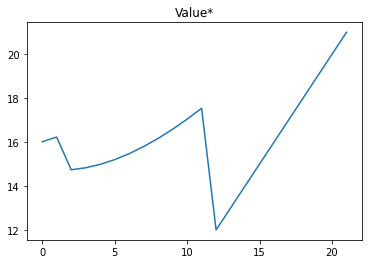

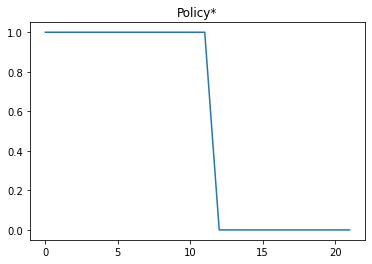

In [101]:
Vstar = value_iteration(np.zeros(22), 0, 1)
plt.figure()
plt.plot(Vstar)
plt.title("Value*")

Pstar = value_to_policy(Vstar, 0, 1)
plt.figure()
plt.plot(Pstar)
plt.title("Policy*")


Text(0.5, 1.0, 'Policy*')

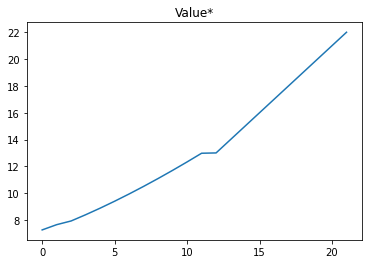

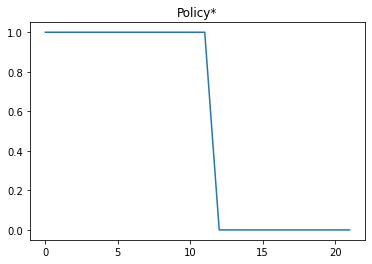

In [95]:
Vstar = value_iteration(np.zeros(22), 0, 0.8)
plt.figure()
plt.plot(Vstar)
plt.title("Value*")

Pstar = value_to_policy(Vstar, 0, 0.8)
plt.figure()
plt.plot(Pstar)
plt.title("Policy*")

Text(0.5, 1.0, 'Policy*')

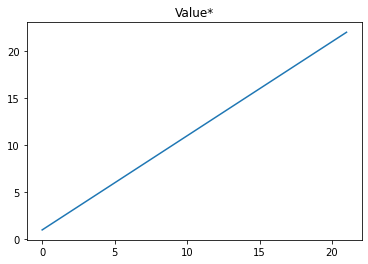

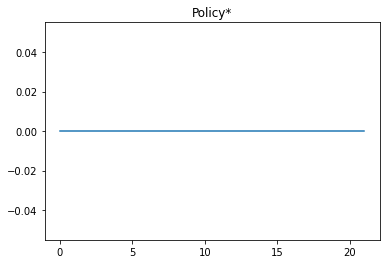

In [97]:
Vstar = value_iteration(np.zeros(22), -8, 1)
plt.figure()
plt.plot(Vstar)
plt.title("Value*")

Pstar = value_to_policy(Vstar, -8, 1)
plt.figure()
plt.plot(Pstar)
plt.title("Policy*")

Text(0.5, 1.0, 'Pstar')

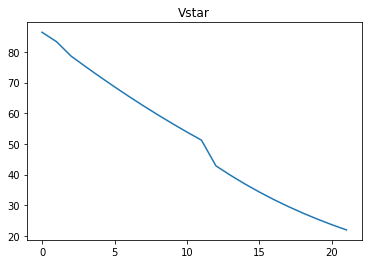

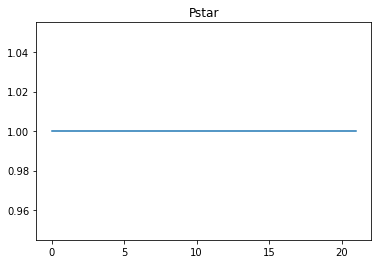

In [37]:
Vstar = value_iteration(np.zeros(22), 22, 1)
plt.figure()
plt.plot(Vstar)
plt.title("Vstar")

Pstar = value_to_policy(Vstar, 22, 1)
plt.figure()
plt.plot(Pstar)
plt.title("Pstar")

In [91]:
def draw() -> int:
  probs = 1/13*np.ones(10)
  probs[-1] *= 4
  return np.random.choice(np.arange(1,11), p=probs)

def Qlearn(
    Q0: npt.NDArray, 
    lr: float, 
    gamma: float, 
    alpha: float, 
    epsilon: float, 
    N: int
    ) -> Tuple[npt.NDArray, npt.NDArray]:

  Q0[0, 1] = 1
  cur = 0
  record = np.zeros((N,3))
  for i in range(N):
    rand = np.random.random()
    action = np.argmax(Q0[cur])

    if rand < epsilon: # explore
      action = abs(action-1)
    


    if action == 1: # draw
      x = draw()
      next_val = 0 if cur + x > 21 else np.max(Q0[cur + x])
      reward = 0 if cur + x > 21 else lr
      Q0[cur, action] = Q0[cur, action] + alpha * (lr + gamma * next_val - Q0[cur, action])
      cur = 0 if cur + x > 21 else cur + x
    else: # stop
      reward = cur
      Q0[cur, action] = Q0[cur, action] + alpha * (cur + gamma * 0 - Q0[cur, action])
      cur = 0
    record[i][0] = cur
    record[i][1] = action
    record[i][2] = reward

  return Q0, record

In [92]:
def RL_analysis():
  lr, gamma, alpha, epsilon, N = 0, 1, 0.1, 0.1, 10000
  visits = np.zeros((22,6))
  rewards = np.zeros((N,6))
  values = np.zeros((22,6))

  for i in range(6):
    _, record = Qlearn(np.zeros((22,2)), lr, gamma, alpha, epsilon, 10000*i)
    vals, counts = np.unique(record[:,0], return_counts=True)
    visits[vals.astype(int),i] = counts
    _, record = Qlearn(np.zeros((22,2)), lr, gamma, alpha, 0.2*i, N)
    rewards[:,i] = record[:,2]
    vals, _ = Qlearn(np.zeros((22,2)), lr, gamma, min(0.2*i+0.1,1), epsilon, N)
    values[:,i] = np.max(vals, axis=1)

  plt.figure()
  plt.plot(visits)
  plt.legend(['N=0', 'N=10k', 'N=20k', 'N=30k' ,'N=40k', 'N=50k'])
  plt.title('Number of visits to each state')

  plt.figure()
  plt.plot(np.cumsum(rewards, axis=0))
  plt.legend(['e=0.0', 'e=0.2', 'e=0.4' ,'e=0.6', 'e=0.8', 'e=1.0'])
  plt.title('Cumulative rewards received')

  plt.figure()
  plt.plot(values)
  plt.legend(['a=0.1' ,'a=0.3', 'a=0.5', 'a=0.7', 'a=0.9', 'a=1.0'])
  plt.title('Estimated state values');

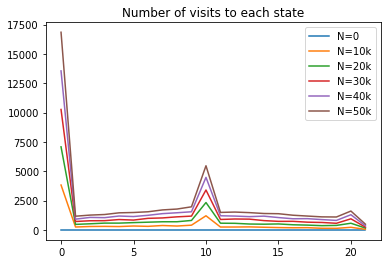

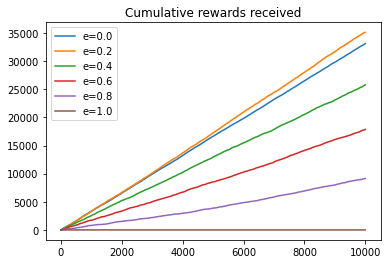

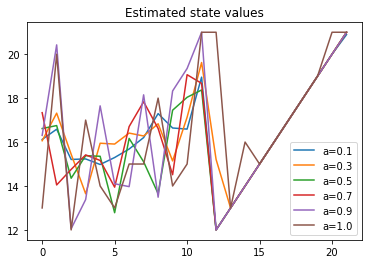

In [93]:
RL_analysis()